## CNN Image Classification
**The CIFAR-10 dataset**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

Here are the classes in the dataset, as well as 10 random images from each:

<img src ="image.png" width = "400px" height = "200px"></img>

* The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks.

In [25]:
# Required libraries:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# For warning ignorance
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To load the cifar-10 dataset:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
# So the data is loaded, now we can check the dimension of train and test samples:
X_train.shape

(50000, 32, 32, 3)

In [4]:
# Similarly for test samples:
X_test.shape

(10000, 32, 32, 3)

In [6]:
# So to see the first six sample images:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [8]:
# We reshape the 2D array into 1D array for displaying the image through a function later:
y_train = y_train.reshape(-1,)
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [9]:
# We can also define the indexs names of 10 classes to print the names of each image along with the image in the function:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
# So next we define a function for image displaying. When we pass the index along with X_train and y_train, it will print 
# the image:

def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

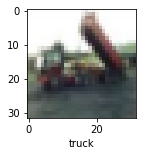

In [19]:
# Let's call the function for an image:
plot_sample(X_train, y_train, 2)

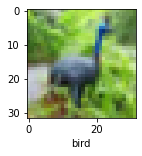

In [20]:
plot_sample(X_train, y_train, 6)

In [22]:
# The next step is to normalize (scal) the dataset.
# To normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from
# 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255.
# For example if we divide X_train into 255, then all the elements of X_train will be divided into 200, and this is the 
# power of numpy array.
X_train/255

array([[[[0.00090734, 0.00095348, 0.00096886],
         [0.00066128, 0.00070742, 0.00069204],
         [0.00076894, 0.00073818, 0.00066128],
         ...,
         [0.00242983, 0.00202999, 0.0016609 ],
         [0.00233756, 0.00192234, 0.00156863],
         [0.00227605, 0.00190696, 0.00158401]],

        [[0.00024606, 0.00030757, 0.00030757],
         [0.        , 0.        , 0.        ],
         [0.00027682, 0.00012303, 0.        ],
         ...,
         [0.00189158, 0.00135333, 0.00084583],
         [0.00183007, 0.00127643, 0.00076894],
         [0.0018762 , 0.00133795, 0.00087659]],

        [[0.00038447, 0.00036909, 0.00032295],
         [0.00024606, 0.00010765, 0.        ],
         [0.00075356, 0.00041522, 0.00012303],
         ...,
         [0.00181469, 0.00129181, 0.00076894],
         [0.00184544, 0.00129181, 0.00076894],
         [0.00167628, 0.00112265, 0.00064591]],

        ...,

        [[0.00319877, 0.00261438, 0.00147636],
         [0.00309112, 0.00235294, 0.00052288]

In [23]:
# So let's do normalization:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [28]:
# So the next step is to build a simple ANN network for image classification to see the performance, and after that we'll
# do CNN for image classification:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5) 

Epoch 1/5
1563/1563 [==============================] - 128s 80ms/step - loss: 2.3008 - accuracy: 0.1206
Epoch 2/5
1563/1563 [==============================] - 126s 81ms/step - loss: 2.2997 - accuracy: 0.1252
Epoch 3/5
1563/1563 [==============================] - 115s 74ms/step - loss: 2.2990 - accuracy: 0.1392
Epoch 4/5
1563/1563 [==============================] - 122s 78ms/step - loss: 2.2980 - accuracy: 0.1508
Epoch 5/5
1563/1563 [==============================] - 135s 87ms/step - loss: 2.2969 - accuracy: 0.1620


In [29]:
# So as we see that for training sample the accuracy is pretty low.
# Let's see for test samples:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 2.2960 - accuracy: 0.1511


[2.2960362434387207, 0.15109999477863312]

In [32]:
# We see that for test samples also the accuracy is very bad.
# So generally we can say that ANN perform very bad on this dataset as we see in the following classification report:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 6s 19ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.16      0.84      0.27      1000
           1       0.00      0.00      0.00      1000
           2       0.12      0.52      0.19      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.36      0.15      0.21      1000

    accuracy                           0.15     10000
   macro avg       0.06      0.15      0.07     10000
weighted avg       0.06      0.15      0.07     10000



In [33]:
# So now we use CNN to see how the performance is going to improve.

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [34]:
# The next step is to compile the model:

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Next we fit and run the model for 10 epochs:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 2.0950 - accuracy: 0.2321
Epoch 2/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.8741 - accuracy: 0.3267
Epoch 3/10
1563/1563 [==============================] - 51s 32ms/step - loss: 1.7349 - accuracy: 0.3736
Epoch 4/10
1563/1563 [==============================] - 52s 34ms/step - loss: 1.6675 - accuracy: 0.3985
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.6244 - accuracy: 0.4155
Epoch 6/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.5875 - accuracy: 0.4296
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.5592 - accuracy: 0.4402
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5348 - accuracy: 0.4493
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 1.5143 - accuracy: 0.4543
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [37]:
# We see that comparing to ANN, CNN perform well for this dataset. 
# After 5 epochs using ANN we had 16% accuracy, but here after 5 epochs we have 41% accuracy.
# Let's see the accuracy on test dataset:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.4815 - accuracy: 0.4685


[1.4814722537994385, 0.4684999883174896]

In [38]:
# To check the classification report:
cnn_y_pred = cnn.predict(X_test)
cnn_y_pred_classes = [np.argmax(element) for element in cnn_y_pred]

print("Classification Report: \n", classification_report(y_test, cnn_y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.53      0.52      1000
           1       0.61      0.53      0.57      1000
           2       0.36      0.34      0.35      1000
           3       0.32      0.34      0.33      1000
           4       0.40      0.39      0.39      1000
           5       0.45      0.38      0.41      1000
           6       0.52      0.54      0.53      1000
           7       0.59      0.48      0.53      1000
           8       0.46      0.69      0.55      1000
           9       0.53      0.47      0.50      1000

    accuracy                           0.47     10000
   macro avg       0.47      0.47      0.47     10000
weighted avg       0.47      0.47      0.47     10000



In [42]:
# Now let's makes some prediction:
# First we need to reshape y_test smaples:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

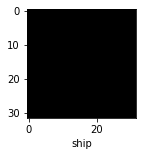

In [45]:
# So now to see one of the y_test image:
plot_sample(X_test, y_test, 2)

In [46]:
# Now let's try to predict this image using our model:
# We predict first 5 smaples:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[1.5536515e-02, 7.8556500e-03, 1.1261734e-01, 4.8034778e-01,
        6.1698463e-02, 2.1139513e-01, 6.7073852e-02, 9.1276076e-03,
        2.7580172e-02, 6.7674997e-03],
       [1.1199434e-01, 6.3688092e-02, 3.2679590e-03, 9.0062735e-04,
        1.4689487e-03, 4.0085334e-04, 2.8230641e-05, 7.9684058e-04,
        6.7923921e-01, 1.3821495e-01],
       [1.1252929e-01, 8.1453577e-02, 5.4897685e-03, 2.5799391e-03,
        3.2358498e-03, 1.3560744e-03, 2.3629941e-04, 1.3097028e-03,
        6.3545537e-01, 1.5635420e-01],
       [2.9428476e-01, 5.2833520e-02, 1.1877949e-02, 3.5381692e-03,
        8.1243347e-03, 1.3091101e-03, 4.4715920e-04, 2.4252399e-03,
        5.9171671e-01, 3.3443030e-02],
       [3.4452581e-03, 3.7162346e-04, 1.0813234e-01, 1.7109944e-01,
        3.6085325e-01, 7.9651505e-02, 2.4439040e-01, 2.7997332e-02,
        3.4125219e-03, 6.4633746e-04]], dtype=float32)

In [47]:
# To see the Max value, we use argmax() function:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

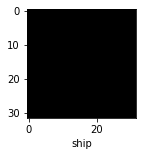

In [51]:
# So if we plot an image from y_test:
plot_sample(X_test, y_test,1)

In [52]:
# To predict this image using CNN model:
classes[y_classes[1]]

'ship'

### Exercise
Use CNN to do handwritten digits classification using MNIST dataset. You can use this notebook as a reference: https://github.com/codebasics/py/blob/master/DeepLearningML/1_digits_recognition/digits_recognition_neural_network.ipynb

Above we used ANN for digits classification. You need to modify this code to use CNN instead. Check how accuracy improves fast with CNN and figure out how CNN can be a better choice for doing image classification compared to ANN. Once you have worked on this problem on your own, you can check my solution by clicking on this link: